### Support Vector Machine Classifier

In [1]:
# importing numpy library

import numpy as np

In [2]:
class SVM_classifier():
    
    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter 
        
        
    # fitting the dataset to SVM Classifier    
    def fit(self, X, Y):
        
        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape
        
        # initiating the weight value and bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # implementing Gradient Descent algorithm
        
        for i in range(self.no_of_iterations):
            self.update_weights()
            
            
    # function for updating the weight and bias value        
    def update_weights(self):
        
        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)
        
        # gradients ( dw, db)
        for index, x_i in enumerate(self.X):
            
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1  # yi(w⋅xi+b) ≥ 1
           
            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
                
            self.w = self.w - self.learning_rate * dw  # w = w - α*dw

            self.b = self.b - self.learning_rate * db  # b = b - α*db
    
    # predict the label for a given input value
    def predict(self, X):
        output = np.dot(X, self.w) + self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat

In [3]:
#import the required libraries
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Loading Data

In [4]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
print(breast_cancer_dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(breast_cancer_dataset.target_names)

['malignant' 'benign']


In [7]:
X=breast_cancer_dataset.data
Y=breast_cancer_dataset.target

In [8]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

#### Train Test Split

In [9]:
#Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


#### Training the Model

Support Vector Machine Classifier

In [11]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [12]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

#### Model Evaluation

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [15]:
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.9076923076923077


In [16]:
# accuracy on training data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_pred)

In [17]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.9122807017543859


In [18]:
print(classification_report(Y_test, X_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        45
           1       0.89      0.97      0.93        69

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



In [19]:
print(confusion_matrix(Y_test, X_test_pred))

[[37  8]
 [ 2 67]]


#### Prediction probabilities

In [20]:
from sklearn import svm

In [21]:
svm_model = svm.SVC(kernel='linear',probability=True)

In [22]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [23]:
svm_probs = svm_model.predict_proba(X_test)

In [24]:
svm_probs = svm_probs[:, 1]

#### Computing AUROC and ROC curve values

In [25]:
svm_auc = roc_auc_score(Y_test, svm_probs) 
print('Support Vector Machine: AUROC =',svm_auc)

Support Vector Machine: AUROC = 0.9887278582930756


In [26]:
svm_fpr, svm_tpr, thresholds = roc_curve(Y_test, svm_probs)

#### Plot the ROC curve

In [27]:
import matplotlib.pyplot as plt

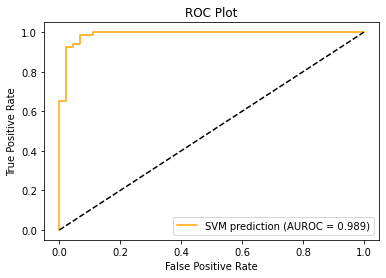

In [28]:
plt.plot(svm_fpr, svm_tpr,color="orange", label='SVM prediction (AUROC = %0.3f)'% svm_auc)
plt.plot([0,1],[0,1],color = "black",linestyle='--')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()